In [1]:
import pandas as pd

data = pd.read_csv('./data/processed_headlines_locations.csv')

data.head()

,Unnamed: 0,cities,headline,Latitude,Longitude,Countries
0,0,Miami,Zika Outbreak Hits Miami,25.77427,-80.19366,United States
1,1,New York City,Could Zika Reach New York City?,40.71427,-74.00597,United States
2,2,Miami Beach,First Case of Zika in Miami Beach,25.79065,-80.13005,United States
3,3,Recife,"Mystery Virus Spreads in Recife, Brazil",-8.05389,-34.88111,Brazil
4,4,Dallas,Dallas man comes down with case of Zika,32.78306,-96.80667,United States


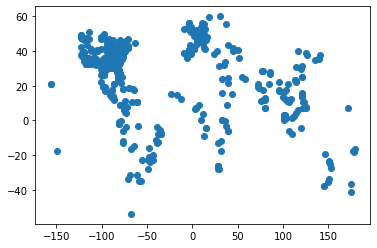

In [3]:
# k-mean & DBSCAN applied to atitude and longitude for each headline
# added as a new column

# let first scatter plot the latitude & longitude
import matplotlib.pyplot as plt
plt.scatter(data.Longitude, data.Latitude)
plt.show()

In [74]:
type(data.Longitude[0])

numpy.float64

In [84]:
# Now let's used KMeans
from sklearn.cluster import KMeans
import numpy as np

# Let's retrieve some random positions
positions = []

for pos in range(len(data)):
    positions.append([data.Longitude[pos],data.Latitude[pos]])

cluster_model = KMeans(n_clusters=35)
assigned_positions = cluster_model.fit_predict(positions)

print('35 Clusters KMeans Result:')
print(assigned_positions[:10])

35 Clusters KMeans Result:
[ 6 10  6  3 33 11 33 25  6 29]


In [46]:
print(positions[assigned_positions[0]][0])

-75.16379


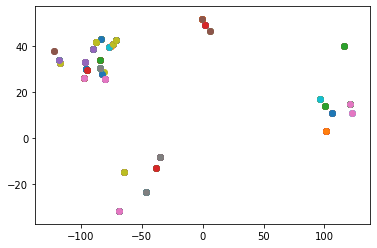

In [85]:
# Let's see the results
import numpy as np

for ps_index in range(len(assigned_positions)):
    plt.scatter(positions[assigned_positions[ps_index]][0], positions[assigned_positions[ps_index]][1])

plt.show()

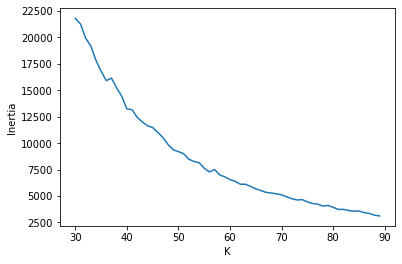

In [86]:
k_values = range(30, 90)
inertia_values = [KMeans(k).fit(positions).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

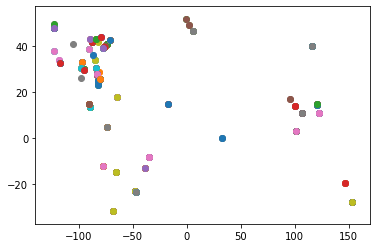

In [87]:
# 60 seems to be the highest break out
# let's see how 60 clusters look like
cluster_model = KMeans(n_clusters=60)
assigned_positions = cluster_model.fit_predict(positions)

for ps_index in range(len(assigned_positions)):
    plt.scatter(positions[assigned_positions[ps_index]][0], positions[assigned_positions[ps_index]][1])

plt.show()

In [90]:
# Setting up Labels for the 60 clusters used in KMean
labels = ['Label'+str(item) for item in set(assigned_positions)]
    

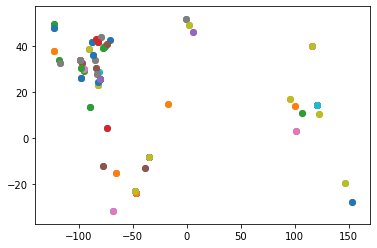

In [169]:
# Move to DBSCAN for the same set of positions
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=0.1, min_samples=2)
positions_clusters = cluster_model.fit_predict(positions)

for ps_index in range(len(positions_clusters)):
    plt.scatter(positions[positions_clusters[ps_index]][0], positions[positions_clusters[ps_index]][1])

plt.show()

In [170]:
len(set(positions_clusters))

54

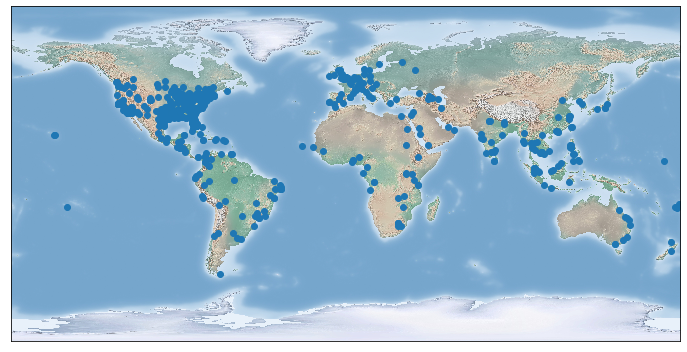

In [118]:
# Showing the raw positions of the headlines
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()
fig = plt.figure(figsize=(12,8))
map_plotter.shadedrelief()
longitudes, latitudes = np.array(positions).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
plt.show()

In [177]:
# Generating the coloring for the 54 clusters
import matplotlib.colors as colors

bounds = list(set(positions_clusters))
# needs to normalize the 54 clusters in range [0..1]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=54)
print(norm)

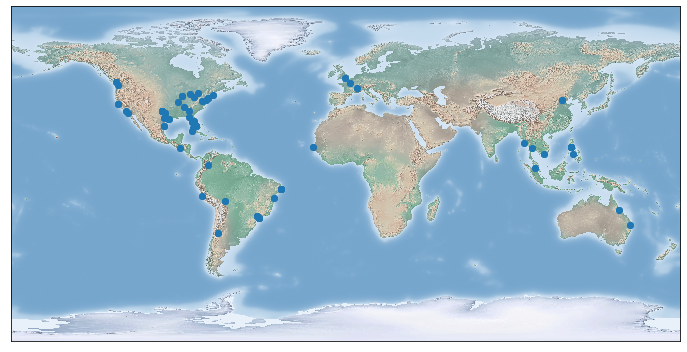

In [176]:
# Showing the DBSCAN results on a map
fig = plt.figure(figsize=(12,8))
longitudes = [] 
latitudes = []
for ps_index in range(len(positions_clusters)):
    longitudes.append(positions[positions_clusters[ps_index]][0])
    latitudes.append(positions[positions_clusters[ps_index]][1])

# longitudes, latitudes = np.array(positions_clusters).T
map_plotter.scatter(longitudes, latitudes, latlon=True, cmap='afmhot')
map_plotter.shadedrelief()
plt.show()

In [161]:
np.savetxt('./data/assigned_positions.csv',[assigned_positions],
          delimiter=',')

In [162]:
np.savetxt('./data/positions_clusters.csv',[positions_clusters],
          delimiter=',')